In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [20]:
images = np.load("../images_CNN.npy")
print(images.shape)
labels = np.load("../labels_CNN.npy")
print(labels.shape)

(1272, 256, 256)
(1272,)


In [21]:
unique_labels, counts = np.unique(labels, return_counts=True)
unique_labels

array(['Cas', 'Gem', 'Ori', 'Per', 'ST', 'UM'], dtype='<U3')

In [24]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)
labels_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [25]:
images = images/255
images.max()

1.0

In [26]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)

(1017, 256, 256)
(1017, 6)


In [29]:
model = keras.Sequential([
    layers.Input(shape=(256, 256, 1)),  

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

overfitting?

In [30]:
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 [==============================] - 56s 2s/step - loss: 0.4567 - accuracy: 0.2999
Epoch 2/10
32/32 [==============================] - 56s 2s/step - loss: 0.1719 - accuracy: 0.8338
Epoch 3/10
32/32 [==============================] - 52s 2s/step - loss: 0.0385 - accuracy: 0.9813
Epoch 4/10
32/32 [==============================] - 53s 2s/step - loss: 0.0041 - accuracy: 0.9990
Epoch 5/10
32/32 [==============================] - 54s 2s/step - loss: 5.8560e-04 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 50s 2s/step - loss: 2.2118e-04 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 52s 2s/step - loss: 1.3653e-04 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 57s 2s/step - loss: 9.9399e-05 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 50s 2s/step - loss: 7.7495e-05 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 50s 2s/step - loss: 6.2231e-05 - accuracy: 1.

In [33]:
predicted_test_prob = model.predict(x_test)

8/8 [==============================] - 6s 688ms/step


In [36]:
predicted_test_labels = np.argmax(predicted_test_prob, axis=1)

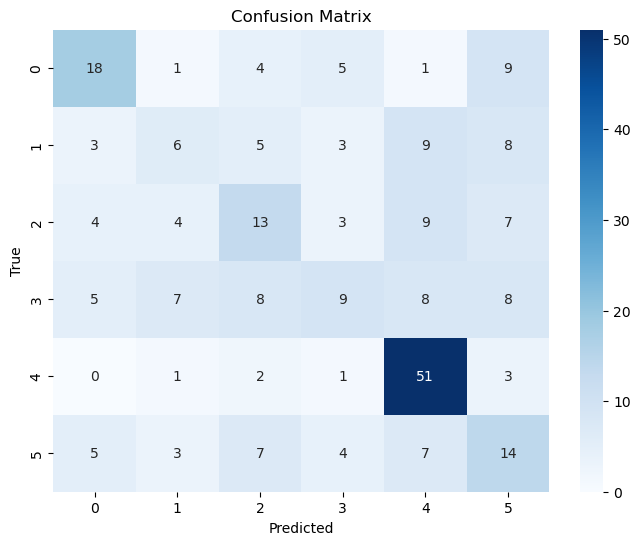

In [37]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49        38
           1       0.27      0.18      0.21        34
           2       0.33      0.33      0.33        40
           3       0.36      0.20      0.26        45
           4       0.60      0.88      0.71        58
           5       0.29      0.35      0.31        40

    accuracy                           0.44       255
   macro avg       0.39      0.40      0.39       255
weighted avg       0.41      0.44      0.41       255

